In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [3]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

features_scaled = df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']]

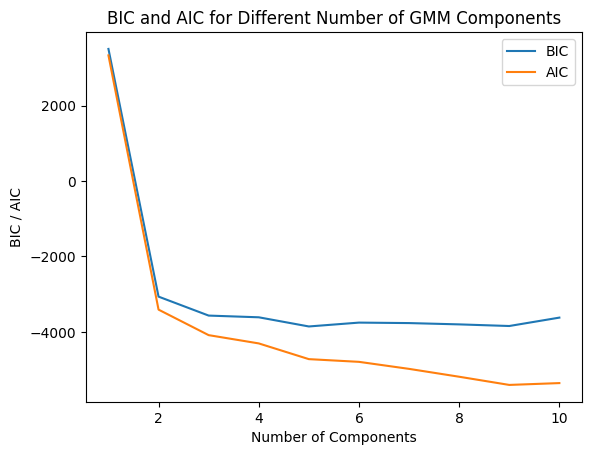

Optimal n_components by BIC: 5
Optimal n_components by AIC: 9


In [4]:
n_components_range = range(1, 11)  
bics = []
aics = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(features_scaled)
    bics.append(gmm.bic(features_scaled))
    aics.append(gmm.aic(features_scaled))

plt.plot(n_components_range, bics, label='BIC')
plt.plot(n_components_range, aics, label='AIC')
plt.xlabel("Number of Components")
plt.ylabel("BIC / AIC")
plt.title("BIC and AIC for Different Number of GMM Components")
plt.legend()
plt.show()

best_n_components_bic = n_components_range[bics.index(min(bics))]
best_n_components_aic = n_components_range[aics.index(min(aics))]
print(f"Optimal n_components by BIC: {best_n_components_bic}")
print(f"Optimal n_components by AIC: {best_n_components_aic}")


Score=0.2663478396016093


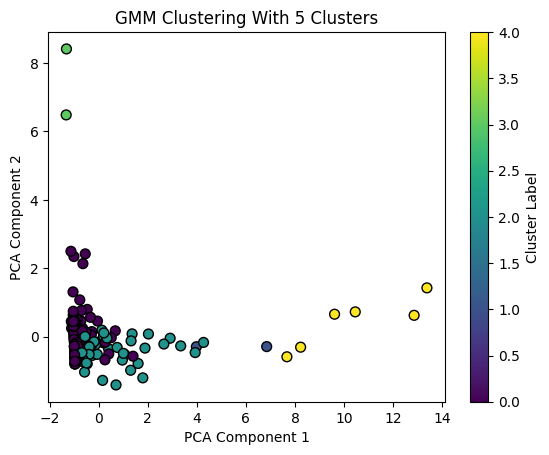

In [8]:
gmm = GaussianMixture(n_components=5, random_state=42)  
gmm_labels = gmm.fit_predict(features_scaled)

df['gmm_cluster5'] = gmm_labels
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

score = silhouette_score(features_scaled, gmm_labels)
print(f'Score={score}')

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("GMM Clustering With 5 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

Score=0.7695463805687585


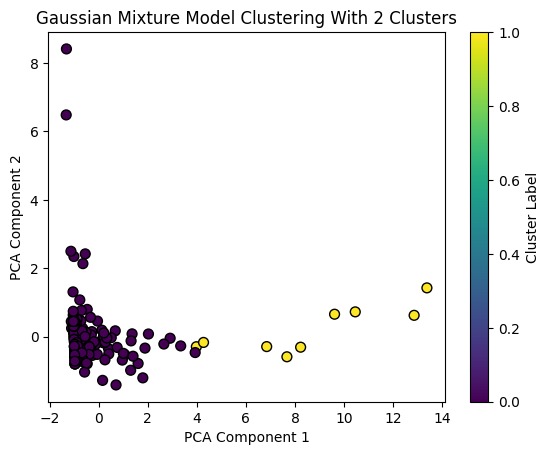

In [10]:
gmm = GaussianMixture(n_components=2, random_state=42)  
gmm_labels = gmm.fit_predict(features_scaled)

df['gmm_cluster2'] = gmm_labels
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

score = silhouette_score(features_scaled, gmm_labels)
print(f'Score={score}')

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=gmm_labels, cmap='viridis', s=50, edgecolor='k')
plt.title("Gaussian Mixture Model Clustering With 2 Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.show()